In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

path=r"C:\Users\jagad\OneDrive\Documents\EDA\Visadataset - Visadataset.csv"
visa_df=pd.read_csv(path)
visa_df.head(3)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied


$Categorical$ vs $Categorical$

In [ ]:
# continent
# case_status
# as we know that there are 25480 observations are there
# in that 16k are from asia applicants
# out of 16k applicants how many visa certified
# out of 16k applicants how many visa denied

In [6]:
c1=visa_df['continent']=='Asia'
c2=visa_df['case_status']=='Certified'
c3=visa_df['case_status']=='Denied'

cert_con=c1&c2
den_con=c1&c3

certified_count=len(visa_df[cert_con])
denied_count=len(visa_df[den_con])
print(f"there are {certified_count} got certified visa from Asia")
print(f"there are {denied_count} got denied visa from Asia")

there are 11012 got certified visa from Asia
there are 5849 got denied visa from Asia


In [7]:
# step-1: make unique lables
# step-2: create empty two lists
# step-3: iterate through loop

labels=visa_df['continent'].unique()
certified_count=[]
denied_count=[]

for i in labels:
    c1=visa_df['continent']==i
    c2=visa_df['case_status']=='Certified'
    c3=visa_df['case_status']=='Denied'

    cert_con=c1&c2
    den_con=c1&c3

    certified_count.append(len(visa_df[cert_con]))
    denied_count.append(len(visa_df[den_con]))
    
labels,certified_count,denied_count

(array(['Asia', 'Africa', 'North America', 'Europe', 'South America',
        'Oceania'], dtype=object),
 [11012, 397, 2037, 2957, 493, 122],
 [5849, 154, 1255, 775, 359, 70])

In [17]:
labels=visa_df['continent'].unique()
certified_count=[]
denied_count=[]

for i in labels:
    c1=visa_df['continent']==i
    c2=visa_df['case_status']=='Certified'
    c3=visa_df['case_status']=='Denied'

    cert_con=c1&c2
    den_con=c1&c3

    certified_count.append(len(visa_df[cert_con]))
    denied_count.append(len(visa_df[den_con]))
    
cols=['Continent','Certified','Denied']
d1=pd.DataFrame(zip(labels,
                 certified_count,
                 denied_count),columns=cols)
d1

,Continent,Certified,Denied
0,Asia,11012,5849
1,Africa,397,154
2,North America,2037,1255
3,Europe,2957,775
4,South America,493,359
5,Oceania,122,70


In [18]:
d1.set_index('Continent')

,Certified,Denied
Continent,,
Asia,11012,5849
Africa,397,154
North America,2037,1255
Europe,2957,775
South America,493,359
Oceania,122,70


**pd.crosstab**

- will take two arguments

- index

- column

In [23]:
col1=visa_df['case_status']
col2=visa_df['continent']
result1=pd.crosstab(col2,col1)
result1

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


In [26]:
col1=[visa_df['continent'],
      visa_df['education_of_employee']]
col2=visa_df['case_status']
result2=pd.crosstab(col1,col2)
result2

case_status                          Certified  Denied
continent     education_of_employee                   
Africa        Bachelor's                    81      62
              Doctorate                     43      11
              High School                   23      43
              Master's                     250      38
Asia          Bachelor's                  4407    2761
              Doctorate                    780     143
              High School                  676    1614
              Master's                    5149    1331
Europe        Bachelor's                  1040     259
              Doctorate                    788      58
              High School                  162     328
              Master's                     967     130
North America Bachelor's                   641     584
              Doctorate                    207      51
              High School                  210     191
              Master's                     979     429
Oceania       Bachelor's                    38      28
              Doctorate                     19       3
              High School                   19      17
              Master's                      46      22
South America Bachelor's                   160     173
              Doctorate                     75      14
              High School                   74      63
              Master's                     184     109

<Axes: xlabel='continent'>

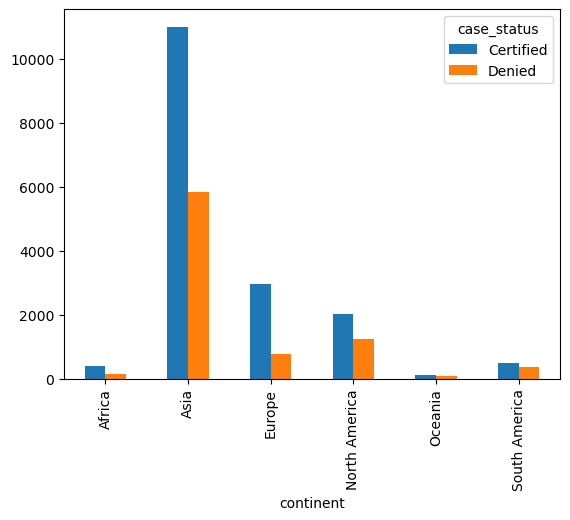

In [24]:
result1.plot(kind='bar')

<Axes: xlabel='case_status,education_of_employee'>

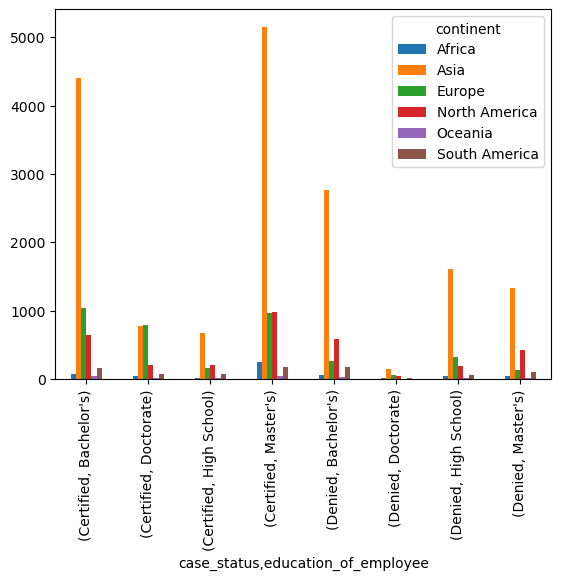

In [25]:
result2.plot(kind='bar')